In [82]:
import json
import numpy as np
import os
import pandas as pd
import re
import statsmodels.formula.api as sm
import time
#import tweepy
import matplotlib.pyplot as plt

from datetime import datetime, date
from dateutil import parser
from scipy import stats

#from textblob import TextBlob
#from HTMLParser import HTMLParser

In [5]:
past_scraped_tweets = pd.DataFrame()
for num in range(1, 13):
    archive = pd.read_csv('archive/archive_{0}.csv'.format(num))
    past_scraped_tweets = past_scraped_tweets.append(archive).drop_duplicates().sort_values(by='timestamp', 
                                                                                            ascending=False)
    print 'archive #{0} added...'.format(num)

archive #1 added...
archive #2 added...
archive #3 added...
archive #4 added...
archive #5 added...
archive #6 added...
archive #7 added...
archive #8 added...
archive #9 added...


/Users/tlaity/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (2,7,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


archive #10 added...
archive #11 added...
archive #12 added...


In [ ]:
past_copy = past_scraped_tweets.loc[past_scraped_tweets.timestamp == past_scraped_tweets.timestamp].copy()

past_copy['timestamp'] = past_copy.apply(lambda row: parser.parse(row['timestamp']), axis=1)
past_copy['timestamp date'] = past_copy.apply(lambda row: row['timestamp'].date(), axis=1)
past_copy['timestamp date'].value_counts()

In [18]:
past_copy['year'] = past_copy.apply(lambda row: row['timestamp date'].year, axis=1)

In [29]:
past_copy_slim = past_copy.loc[past_copy['timestamp date'] > date(2017, 03, 01)]

In [ ]:
past_copy_slim['sentiment'] = past_copy_slim.apply(lambda row: float(row.sentiment), axis=1)
past_copy_slim['likes'] = past_copy_slim.apply(lambda row: float(row.likes), axis=1)
past_copy_slim['retweets'] = past_copy_slim.apply(lambda row: float(row.retweets), axis=1)
past_copy_slim['subjectivity'] = past_copy_slim.apply(lambda row: float(row.subjectivity), axis=1)

In [ ]:
past_copy_slim['lw_sentiment'] = past_copy_slim.apply(lambda row: row.sentiment * row.likes, axis=1)
past_copy_slim['rw_sentiment'] = past_copy_slim.apply(lambda row: row.sentiment * row.retweets, axis=1)
past_copy_slim['lrw_sentiment'] = past_copy_slim.apply(lambda row: row.lw_sentiment + row.rw_sentiment, axis=1)

In [52]:
past_copy_slim['positive_dummy'] = past_copy_slim.apply(lambda row: float(row['positive_dummy']), axis=1)
past_copy_slim['neutral_dummy'] = past_copy_slim.apply(lambda row: float(row['neutral_dummy']), axis=1)
past_copy_slim['negative_dummy'] = past_copy_slim.apply(lambda row: float(row['negative_dummy']), axis=1)

/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cav

In [42]:
counter = 0
past_copy_slim['lw_positive'] = past_copy_slim.apply(lambda row: int(row.positive_dummy) * row.likes, axis=1)
counter += 1
print 'done {0}'.format(counter)
past_copy_slim['rw_positive'] = past_copy_slim.apply(lambda row: int(row.positive_dummy) * row.retweets, axis=1)
counter += 1
print 'done {0}'.format(counter)
past_copy_slim['lrw_positive'] = past_copy_slim.apply(lambda row: row.lw_positive + row.rw_positive, axis=1)
counter += 1
print 'done {0}'.format(counter)

past_copy_slim['lw_neutral'] = past_copy_slim.apply(lambda row: int(row.neutral_dummy) * row.likes, axis=1)
counter += 1
print 'done {0}'.format(counter)
past_copy_slim['rw_neutral'] = past_copy_slim.apply(lambda row: int(row.neutral_dummy) * row.retweets, axis=1)
counter += 1
print 'done {0}'.format(counter)
past_copy_slim['lrw_neutral'] = past_copy_slim.apply(lambda row: row.lw_neutral + row.rw_neutral, axis=1)
counter += 1
print 'done {0}'.format(counter)

past_copy_slim['lw_negative'] = past_copy_slim.apply(lambda row: int(row.negative_dummy) * row.likes, axis=1)
counter += 1
print 'done {0}'.format(counter)
past_copy_slim['rw_negative'] = past_copy_slim.apply(lambda row: int(row.negative_dummy) * row.retweets, axis=1)
counter += 1
print 'done {0}'.format(counter)
past_copy_slim['lrw_negative'] = past_copy_slim.apply(lambda row: row.lw_negative + row.rw_negative, axis=1)
counter += 1
print 'done {0}'.format(counter)

/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


done 1


/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done 2


/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done 3


/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done 4


/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done 5


/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done 6


/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done 7


/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


done 8
done 9


/Users/tlaity/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [47]:
past_copy_slim.columns

Index([u'id', u'likes', u'negative_dummy', u'neutral_dummy', u'positive_dummy',
       u'retweets', u'sentiment', u'subjectivity', u'text', u'timestamp',
       u'timestamp date', u'year', u'lw_sentiment', u'rw_sentiment',
       u'lw_positive', u'rw_positive', u'lrw_positive', u'lw_neutral',
       u'rw_neutral', u'lrw_neutral', u'lw_negative', u'rw_negative',
       u'lrw_negative'],
      dtype='object')

In [55]:
past_copy_slim.to_csv('cleaned_data.csv', index=False)

In [93]:
past_copy_first = pd.read_csv('cleaned_data.csv')

In [96]:
past_copy_first['timestamp date'] = past_copy_first.apply(lambda row: parser.parse(row['timestamp date']).date(), axis=1)
counts = past_copy_first.groupby('timestamp date').count().reset_index()[['timestamp date', 'text']]

In [97]:
dates = counts.loc[counts['text'] > 10000]['timestamp date']

In [ ]:
past_copy_slim = past_copy_first.loc[past_copy_first['timestamp date'].isin(dates)]

In [128]:
len(dates)

12

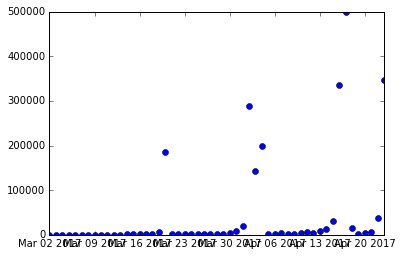

In [86]:
%matplotlib inline
plt.plot_date(counts['timestamp date'], counts['text'])

In [100]:
grouped1 = past_copy_slim.groupby('timestamp date').sum()
grouped1['positive_prop'] = grouped1.apply(lambda row: row['positive_dummy']/(row['positive_dummy'] + row['neutral_dummy'] + row['negative_dummy']), axis=1)
grouped1['negative_prop'] = grouped1.apply(lambda row: row['negative_dummy']/(row['positive_dummy'] + row['neutral_dummy'] + row['negative_dummy']), axis=1)

grouped1['tweet margin'] = grouped1.apply(lambda row: (row['positive_dummy'] - row['negative_dummy'])/(row['positive_dummy'] + row['negative_dummy']), axis=1)
grouped1['lw margin'] = grouped1.apply(lambda row: (row['lw_positive'] - row['lw_negative'])/(row['lw_positive'] + row['lw_negative']), axis=1)
grouped1['rw margin'] = grouped1.apply(lambda row: (row['rw_positive'] - row['rw_negative'])/(row['rw_positive'] + row['rw_negative']), axis=1)
grouped1['lrw margin'] = grouped1.apply(lambda row: (row['lrw_positive'] - row['lrw_negative'])/(row['lrw_positive'] + row['lrw_negative']), axis=1)

grouped1.head()

,id,likes,negative_dummy,neutral_dummy,positive_dummy,retweets,sentiment,subjectivity,year,lw_sentiment,...,lrw_neutral,lw_negative,rw_negative,lrw_negative,positive_prop,negative_prop,tweet margin,lw margin,rw margin,lrw margin
timestamp date,,,,,,,,,,,,,,,,,,,,,
2017-03-20,6.776172e+20,339007183.0,40074.0,92165.0,53914.0,191131929.0,4515.040574,58154.925763,375470601,8.601124e+06,...,300105284.0,65426007.0,32807656.0,98233663.0,0.289622,0.215275,0.147253,0.135380,0.166190,0.145920
2017-04-01,1.752445e+22,209741591.0,5679.0,8887.0,6098.0,86537622.0,478.010441,6760.900168,41679288,-2.537704e+07,...,88199735.0,139259061.0,42131588.0,181390649.0,0.295103,0.274826,0.035578,-0.764408,-0.677684,-0.743475
2017-04-02,2.455885e+23,340643662.0,55007.0,150297.0,84199.0,136747497.0,9487.020718,82726.488497,583927551,8.217468e+06,...,390799824.0,14693931.0,7666750.0,22360681.0,0.290840,0.190005,0.209704,0.492831,0.464733,0.483535
2017-04-03,1.211137e+23,341764620.0,28183.0,68808.0,45711.0,143283890.0,5325.116862,41819.949809,287829934,5.363623e+07,...,175400311.0,33636598.0,21345008.0,54981606.0,0.320325,0.197495,0.237205,0.697974,0.508792,0.644877
2017-04-04,1.698314e+23,161923470.0,43105.0,101093.0,55829.0,76017427.0,3552.973031,58074.936140,403454459,9.347009e+06,...,127490556.0,28863553.0,13553634.0,42417187.0,0.279107,0.215496,0.128611,0.232197,0.231338,0.231923


In [18]:
grouped = past_copy_slim.groupby('timestamp date').mean()
grouped['tweet margin'] = grouped['positive_dummy'] - grouped['negative_dummy']
grouped['lw margin'] = grouped['lw_positive'] - grouped['lw_negative']
grouped['rw margin'] = grouped['rw_positive'] - grouped['rw_negative']
grouped['lrw margin'] = grouped['lrw_positive'] - grouped['lrw_negative']

grouped.head()

,id,likes,negative_dummy,neutral_dummy,positive_dummy,retweets,sentiment,subjectivity,year,lw_sentiment,...,lw_neutral,rw_neutral,lrw_neutral,lw_negative,rw_negative,lrw_negative,tweet margin,lw margin,rw margin,lrw margin
timestamp date,,,,,,,,,,,,,,,,,,,,,
2017-03-02,8.372970e+17,3606.491961,0.202572,0.504823,0.292605,1857.141479,0.012109,0.274104,2017,4.952525,...,1605.106109,655.051447,2260.157556,354.289389,180.890675,535.180064,0.090032,1292.807074,840.308682,2133.115756
2017-03-03,8.376679e+17,2340.105850,0.222841,0.479109,0.298050,1485.423398,0.042614,0.278693,2017,175.641958,...,678.752089,557.264624,1236.016713,260.175487,214.395543,474.571031,0.075209,1141.002786,499.367688,1640.370474
2017-03-04,8.380420e+17,17372.167630,0.262042,0.495183,0.242775,6921.304432,-0.029993,0.317863,2017,-6104.256795,...,8635.747592,3623.618497,12259.366089,8213.788054,3040.414258,11254.202312,-0.019268,-7691.156069,-2783.142582,-10474.298651
2017-03-05,8.383836e+17,3191.685149,0.192079,0.461386,0.346535,2765.631683,0.068575,0.309035,2017,93.857588,...,2042.978218,2045.677228,4088.655446,523.574257,353.289109,876.863366,0.154455,101.558416,13.376238,114.934653
2017-03-06,8.387548e+17,4794.236220,0.228346,0.480315,0.291339,2200.375984,-0.001216,0.341138,2017,297.123458,...,3135.610236,1377.385827,4512.996063,554.988189,293.803150,848.791339,0.062992,548.649606,235.383858,784.033465


In [101]:
grouped_slim = grouped1.reset_index()
grouped_slim.columns

Index([u'timestamp date', u'id', u'likes', u'negative_dummy', u'neutral_dummy',
       u'positive_dummy', u'retweets', u'sentiment', u'subjectivity', u'year',
       u'lw_sentiment', u'rw_sentiment', u'lw_positive', u'rw_positive',
       u'lrw_positive', u'lw_neutral', u'rw_neutral', u'lrw_neutral',
       u'lw_negative', u'rw_negative', u'lrw_negative', u'positive_prop',
       u'negative_prop', u'tweet margin', u'lw margin', u'rw margin',
       u'lrw margin'],
      dtype='object')

In [131]:
pd.set_option("display.max_columns",101)
pd.set_option("display.max_rows",101)

In [132]:
grouped.reset_index()

,timestamp date,id,likes,negative_dummy,neutral_dummy,positive_dummy,retweets,sentiment,subjectivity,year,lw_sentiment,rw_sentiment,lw_positive,rw_positive,lrw_positive,lw_neutral,rw_neutral,lrw_neutral,lw_negative,rw_negative,lrw_negative,tweet margin,lw margin,rw margin,lrw margin
0,2017-03-02,8.372970e+17,3606.491961,0.202572,0.504823,0.292605,1857.141479,0.012109,0.274104,2017,4.952525,15.101738,1647.096463,1021.199357,2668.295820,1605.106109,655.051447,2260.157556,354.289389,180.890675,535.180064,0.090032,1292.807074,840.308682,2133.115756
1,2017-03-03,8.376679e+17,2340.105850,0.222841,0.479109,0.298050,1485.423398,0.042614,0.278693,2017,175.641958,80.974442,1401.178273,713.763231,2114.941504,678.752089,557.264624,1236.016713,260.175487,214.395543,474.571031,0.075209,1141.002786,499.367688,1640.370474
2,2017-03-04,8.380420e+17,17372.167630,0.262042,0.495183,0.242775,6921.304432,-0.029993,0.317863,2017,-6104.256795,-2170.057203,522.631985,257.271676,779.903661,8635.747592,3623.618497,12259.366089,8213.788054,3040.414258,11254.202312,-0.019268,-7691.156069,-2783.142582,-10474.298651
3,2017-03-05,8.383836e+17,3191.685149,0.192079,0.461386,0.346535,2765.631683,0.068575,0.309035,2017,93.857588,61.084009,625.132673,366.665347,991.798020,2042.978218,2045.677228,4088.655446,523.574257,353.289109,876.863366,0.154455,101.558416,13.376238,114.934653
4,2017-03-06,8.387548e+17,4794.236220,0.228346,0.480315,0.291339,2200.375984,-0.001216,0.341138,2017,297.123458,104.895088,1103.637795,529.187008,1632.824803,3135.610236,1377.385827,4512.996063,554.988189,293.803150,848.791339,0.062992,548.649606,235.383858,784.033465
5,2017-03-07,8.390853e+17,4684.576659,0.189931,0.478261,0.331808,1629.613272,0.058744,0.280581,2017,350.024925,92.284531,3402.450801,872.995423,4275.446224,617.244851,378.361556,995.606407,664.881007,378.256293,1043.137300,0.141876,2737.569794,494.739130,3232.308924
6,2017-03-08,8.394725e+17,5358.516199,0.159827,0.473002,0.367171,2677.466523,0.047953,0.329259,2017,312.031090,155.638818,1170.596112,602.263499,1772.859611,4018.293737,1995.747300,6014.041037,169.626350,79.455724,249.082073,0.207343,1000.969762,522.807775,1523.777538
7,2017-03-09,8.398416e+17,13820.997636,0.160757,0.631206,0.208038,7960.234043,0.001018,0.237689,2017,252.926450,141.978341,1308.508274,741.250591,2049.758865,12346.609929,7132.947991,19479.557920,165.879433,86.035461,251.914894,0.047281,1142.628842,655.215130,1797.843972
8,2017-03-10,8.401975e+17,2617.726415,0.224057,0.464623,0.311321,1710.691038,0.030082,0.290039,2017,-102.932162,-124.648122,505.101415,272.778302,777.879717,1022.695755,601.764151,1624.459906,1089.929245,836.148585,1926.077830,0.087264,-584.827830,-563.370283,-1148.198113
9,2017-03-11,8.405481e+17,3375.928382,0.236074,0.461538,0.302387,1701.846154,0.018534,0.294867,2017,-0.208125,-32.111283,375.177719,204.671088,579.848806,2316.238727,1073.488064,3389.726790,684.511936,423.687003,1108.198939,0.066313,-309.334218,-219.015915,-528.350133


In [ ]:
grouped_slim['timestamp date'] = grouped_slim.apply(lambda row: parser.parse(row['timestamp date']).date(), axis=1)

In [6]:
# import poll data
aggregate_poll = pd.read_csv('aggregate_polls.csv')
gallup_poll = pd.read_csv('gallup_polls.csv')
ucsb_poll = pd.read_csv('ucsb_polls.csv')
rasmussen_poll = pd.read_csv('rasmussen_polls.csv')

In [ ]:
aggregate_poll['Start Date'] = aggregate_poll.apply(lambda row: parser.parse(row['Start Date']).date(), axis=1)
aggregate_poll['End Date'] = aggregate_poll.apply(lambda row: parser.parse(row['End Date']).date(), axis=1)

gallup_poll['Start Date'] = gallup_poll.apply(lambda row: parser.parse(row['Start Date']).date(), axis=1)
gallup_poll['End Date'] = gallup_poll.apply(lambda row: parser.parse(row['End Date']).date(), axis=1)

ucsb_poll['Start Date'] = ucsb_poll.apply(lambda row: parser.parse(row['Start Date']).date(), axis=1)
ucsb_poll['End Date'] = ucsb_poll.apply(lambda row: parser.parse(row['End Date']).date(), axis=1)

rasmussen_poll['Date'] = rasmussen_poll.apply(lambda row: parser.parse(row['Date']).date(), axis=1)

In [104]:
tweet_margin = pd.Series()
lw_margin = pd.Series()
rw_margin = pd.Series()
lrw_margin = pd.Series()
for d in rasmussen_poll['Date']:
    tweet_margin = tweet_margin.append(grouped_slim.loc[grouped_slim['timestamp date'] == d]['tweet margin'])
    lw_margin = lw_margin.append(grouped_slim.loc[grouped_slim['timestamp date'] == d]['lw margin'])
    rw_margin = rw_margin.append(grouped_slim.loc[grouped_slim['timestamp date'] == d]['rw margin'])
    lrw_margin = rw_margin.append(grouped_slim.loc[grouped_slim['timestamp date'] == d]['lrw margin'])
rasmussen_poll['tweet_margin'] = tweet_margin
rasmussen_poll['like_weight_margin'] = lw_margin
rasmussen_poll['retweet_weight_margin'] = rw_margin
rasmussen_poll['like_retweet_weight_margin'] = lrw_margin

tweet_margin = pd.Series()
lw_margin = pd.Series()
rw_margin = pd.Series()
lrw_margin = pd.Series()
for ind, row in aggregate_poll.iterrows():
    sub = grouped_slim.loc[grouped_slim['timestamp date'] >= row['Start Date']].loc[grouped_slim['timestamp date'] <= row['End Date']]
    tweet_margin = tweet_margin.append(pd.Series(np.nanmean(sub['tweet margin'])))
    lw_margin = lw_margin.append(pd.Series(np.nanmean(sub['lw margin'])))
    rw_margin = rw_margin.append(pd.Series(np.nanmean(sub['rw margin'])))
    lrw_margin = lrw_margin.append(pd.Series(np.nanmean(sub['lrw margin'])))
aggregate_poll['tweet_margin'] = tweet_margin.reset_index().iloc[:,1]
aggregate_poll['like_weight_margin'] = lw_margin.reset_index().iloc[:,1]
aggregate_poll['retweet_weight_margin'] = rw_margin.reset_index().iloc[:,1]
aggregate_poll['like_retweet_weight_margin'] = lrw_margin.reset_index().iloc[:,1]


tweet_margin = pd.Series()
lw_margin = pd.Series()
rw_margin = pd.Series()
lrw_margin = pd.Series()
for ind, row in gallup_poll.iterrows():
    sub = grouped_slim.loc[grouped_slim['timestamp date'] >= row['Start Date']].loc[grouped_slim['timestamp date'] <= row['End Date']]
    tweet_margin = tweet_margin.append(pd.Series(np.nanmean(sub['tweet margin'])))
    lw_margin = lw_margin.append(pd.Series(np.nanmean(sub['lw margin'])))
    rw_margin = rw_margin.append(pd.Series(np.nanmean(sub['rw margin'])))
    lrw_margin = lrw_margin.append(pd.Series(np.nanmean(sub['lrw margin'])))
gallup_poll['tweet_margin'] = tweet_margin.reset_index().iloc[:,1]
gallup_poll['like_weight_margin'] = lw_margin.reset_index().iloc[:,1]
gallup_poll['retweet_weight_margin'] = rw_margin.reset_index().iloc[:,1]
gallup_poll['like_retweet_weight_margin'] = lrw_margin.reset_index().iloc[:,1]

tweet_margin = pd.Series()
lw_margin = pd.Series()
rw_margin = pd.Series()
lrw_margin = pd.Series()
for ind, row in ucsb_poll.iterrows():
    sub = grouped_slim.loc[grouped_slim['timestamp date'] >= row['Start Date']].loc[grouped_slim['timestamp date'] <= row['End Date']]
    tweet_margin = tweet_margin.append(pd.Series(np.nanmean(sub['tweet margin'])))
    lw_margin = lw_margin.append(pd.Series(np.nanmean(sub['lw margin'])))
    rw_margin = rw_margin.append(pd.Series(np.nanmean(sub['rw margin'])))
    lrw_margin = lrw_margin.append(pd.Series(np.nanmean(sub['lrw margin'])))
ucsb_poll['tweet_margin'] = tweet_margin.reset_index().iloc[:,1]
ucsb_poll['like_weight_margin'] = lw_margin.reset_index().iloc[:,1]
ucsb_poll['retweet_weight_margin'] = rw_margin.reset_index().iloc[:,1]
ucsb_poll['like_retweet_weight_margin'] = lrw_margin.reset_index().iloc[:,1]

In [105]:
rasmussen_slim = rasmussen_poll[['Date', 'Margin', 'tweet_margin', 'like_weight_margin', 'retweet_weight_margin', 'like_retweet_weight_margin']].dropna()

aggregate_slim = aggregate_poll[['Start Date', 'End Date', 'Margin', 'tweet_margin', 'like_weight_margin', 'retweet_weight_margin', 'like_retweet_weight_margin']].dropna()
gallup_slim = gallup_poll[['Start Date', 'End Date', 'Margin', 'tweet_margin', 'like_weight_margin', 'retweet_weight_margin', 'like_retweet_weight_margin']].dropna()
ucsb_slim = ucsb_poll[['Start Date', 'End Date', 'Margin', 'tweet_margin', 'like_weight_margin', 'retweet_weight_margin', 'like_retweet_weight_margin']].dropna()

In [106]:
rasmussen_slim.name = 'rasmussen'
aggregate_slim.name = 'aggregate'
gallup_slim.name = 'gallup'
ucsb_slim.name = 'ucsb'

In [129]:
for x in [rasmussen_slim, aggregate_slim, gallup_slim, ucsb_slim]:
    print len(x), '\n'

6 

15 

4 

12 



In [110]:
polls = pd.Series()
margin = pd.Series()
correlation = pd.Series()
sig = pd.Series()

for x in [rasmussen_slim, aggregate_slim, gallup_slim, ucsb_slim]:
    
    for y in ['tweet_margin']:
              #, 'like_weight_margin', 'retweet_weight_margin', 'like_retweet_weight_margin']:
        polls = polls.append(pd.Series(x.name))
        margin = margin.append(pd.Series(y))
        pearson_tuple = stats.pearsonr(x['Margin'], x[y])
        correlation = correlation.append(pd.Series(pearson_tuple[0]))
        sig = sig.append(pd.Series(pearson_tuple[1]))
        
print 'model: raw avg tweet %'
metrics = pd.DataFrame()
#metrics['polls'] = polls
metrics['margin'] = margin
metrics['correlation'] = correlation
metrics['p value'] = sig
metrics.index=polls
metrics.transpose()

model: raw avg tweet %


,rasmussen,aggregate,gallup,ucsb
margin,tweet_margin,tweet_margin,tweet_margin,tweet_margin
correlation,-0.128069,0.204526,0.812627,0.634674
p value,0.808946,0.464663,0.187373,0.026622


In [125]:
polls = pd.Series()
margin = pd.Series()
correlation = pd.Series()
sig = pd.Series()

for x in [rasmussen_slim, aggregate_slim, gallup_slim, ucsb_slim]:
    
    for y in ['like_weight_margin']:
              #, 'like_weight_margin', 'retweet_weight_margin', 'like_retweet_weight_margin']:
        polls = polls.append(pd.Series(x.name))
        margin = margin.append(pd.Series(y))
        pearson_tuple = stats.pearsonr(x['Margin'], x[y])
        correlation = correlation.append(pd.Series(pearson_tuple[0]))
        sig = sig.append(pd.Series(pearson_tuple[1]))
        
print 'model: avg tweet %, weighted by likes'
metrics = pd.DataFrame()
#metrics['polls'] = polls
metrics['margin'] = margin
metrics['correlation'] = correlation
metrics['p value'] = sig
metrics.index=polls
metrics.transpose()

model: avg tweet %, weighted by likes


,rasmussen,aggregate,gallup,ucsb
margin,like_weight_margin,like_weight_margin,like_weight_margin,like_weight_margin
correlation,0.0228929,0.0887661,0.977518,0.612605
p value,0.965667,0.753076,0.0224822,0.0342004


In [112]:
polls = pd.Series()
margin = pd.Series()
correlation = pd.Series()
sig = pd.Series()

for x in [rasmussen_slim, aggregate_slim, gallup_slim, ucsb_slim]:
    
    for y in ['retweet_weight_margin']:
              #, 'like_weight_margin', 'retweet_weight_margin', 'like_retweet_weight_margin']:
        polls = polls.append(pd.Series(x.name))
        margin = margin.append(pd.Series(y))
        pearson_tuple = stats.pearsonr(x['Margin'], x[y])
        correlation = correlation.append(pd.Series(pearson_tuple[0]))
        sig = sig.append(pd.Series(pearson_tuple[1]))
        
print 'model: avg tweet %, weighted by retweets'
metrics = pd.DataFrame()
#metrics['polls'] = polls
metrics['margin'] = margin
metrics['correlation'] = correlation
metrics['p value'] = sig
metrics.index=polls
metrics.transpose()

model: avg tweet %, weighted by retweets


,rasmussen,aggregate,gallup,ucsb
margin,retweet_weight_margin,retweet_weight_margin,retweet_weight_margin,retweet_weight_margin
correlation,-0.0181568,0.152645,0.969629,0.559339
p value,0.972768,0.587058,0.0303706,0.0586454


In [113]:
polls = pd.Series()
margin = pd.Series()
correlation = pd.Series()
sig = pd.Series()

for x in [rasmussen_slim, aggregate_slim, gallup_slim, ucsb_slim]:
    
    for y in ['like_retweet_weight_margin']:
              #, 'like_weight_margin', 'retweet_weight_margin', 'like_retweet_weight_margin']:
        polls = polls.append(pd.Series(x.name))
        margin = margin.append(pd.Series(y))
        pearson_tuple = stats.pearsonr(x['Margin'], x[y])
        correlation = correlation.append(pd.Series(pearson_tuple[0]))
        sig = sig.append(pd.Series(pearson_tuple[1]))
        
print 'model: avg tweet %, weighted by likes and retweets'
metrics = pd.DataFrame()
#metrics['polls'] = polls
metrics['margin'] = margin
metrics['correlation'] = correlation
metrics['p value'] = sig
metrics.index=polls
metrics.transpose()

model: avg tweet %, weighted by likes and retweets


,rasmussen,aggregate,gallup,ucsb
margin,like_retweet_weight_margin,like_retweet_weight_margin,like_retweet_weight_margin,like_retweet_weight_margin
correlation,-0.0181568,0.10523,0.98031,0.598533
p value,0.972768,0.708974,0.0196895,0.039772


In [114]:
mod = sm.ols(formula="Margin ~ tweet_margin", data=rasmussen_slim).fit()
print 'Poll Margin ~ tweet_margin: Rasmussen\n'
print mod.summary()

Poll Margin ~ tweet_margin: Rasmussen

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.229
Method:                 Least Squares   F-statistic:                   0.06670
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.809
Time:                        21:48:20   Log-Likelihood:                 13.100
No. Observations:                   6   AIC:                            -22.20
Df Residuals:                       4   BIC:                            -22.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept

/Users/tlaity/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  "samples were given." % int(n))


In [115]:
mod = sm.ols(formula="Margin ~ tweet_margin", data=aggregate_slim).fit()
print 'Poll Margin ~ tweet_margin: Aggregate\n'
print mod.summary()

Poll Margin ~ tweet_margin: Aggregate

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.5675
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.465
Time:                        21:49:16   Log-Likelihood:                 21.521
No. Observations:                  15   AIC:                            -39.04
Df Residuals:                      13   BIC:                            -37.63
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept

/Users/tlaity/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))


In [116]:
mod = sm.ols(formula="Margin ~ tweet_margin", data=gallup_slim).fit()
print 'Poll Margin ~ tweet_margin: Gallup\n'
print mod.summary()

Poll Margin ~ tweet_margin: Gallup

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.660
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     3.889
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.187
Time:                        21:49:23   Log-Likelihood:                 11.428
No. Observations:                   4   AIC:                            -18.86
Df Residuals:                       2   BIC:                            -20.08
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept   

/Users/tlaity/anaconda/lib/python2.7/site-packages/statsmodels/stats/stattools.py:72: UserWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n))


In [117]:
mod = sm.ols(formula="Margin ~ tweet_margin", data=ucsb_slim).fit()
print 'Poll Margin ~ tweet_margin: UCSB\n'
print mod.summary()

Poll Margin ~ tweet_margin: UCSB

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.343
Method:                 Least Squares   F-statistic:                     6.745
Date:                Wed, 26 Apr 2017   Prob (F-statistic):             0.0266
Time:                        21:49:32   Log-Likelihood:                 28.507
No. Observations:                  12   AIC:                            -53.01
Df Residuals:                      10   BIC:                            -52.04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
Intercept     

/Users/tlaity/anaconda/lib/python2.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [66]:
mod = sm.ols(formula="Margin ~ tweet_margin + like_weight_margin", data=rasmussen_slim).fit()
print 'Poll Margin ~ tweet_margin + like_weight_margin: Rasmussen\n'
print mod.summary()

Poll Margin ~ tweet_margin + like_weight_margin: Rasmussen

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.167
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.330
Time:                        15:59:43   Log-Likelihood:                 38.397
No. Observations:                  25   AIC:                            -70.79
Df Residuals:                      22   BIC:                            -67.14
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------

In [67]:
mod = sm.ols(formula="Margin ~ tweet_margin + like_weight_margin", data=aggregate_slim).fit()
print 'Poll Margin ~ tweet_margin + like_weight_margin: Aggregate\n'
print mod.summary()

Poll Margin ~ tweet_margin + like_weight_margin: Aggregate

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     2.122
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.134
Time:                        15:59:45   Log-Likelihood:                 59.589
No. Observations:                  41   AIC:                            -113.2
Df Residuals:                      38   BIC:                            -108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------

In [68]:
mod = sm.ols(formula="Margin ~ tweet_margin + like_weight_margin", data=gallup_slim).fit()
print 'Poll Margin ~ tweet_margin + like_weight_margin: Gallup\n'
print mod.summary()

Poll Margin ~ tweet_margin + like_weight_margin: Gallup

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.074
Model:                            OLS   Adj. R-squared:                 -0.389
Method:                 Least Squares   F-statistic:                    0.1599
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.857
Time:                        15:59:47   Log-Likelihood:                 13.736
No. Observations:                   7   AIC:                            -21.47
Df Residuals:                       4   BIC:                            -21.63
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------

In [69]:
mod = sm.ols(formula="Margin ~ tweet_margin + like_weight_margin", data=ucsb_slim).fit()
print 'Poll Margin ~ tweet_margin + like_weight_margin: UCSB\n'
print mod.summary()

Poll Margin ~ tweet_margin + like_weight_margin: UCSB

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5775
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.566
Time:                        15:59:49   Log-Likelihood:                 78.213
No. Observations:                  45   AIC:                            -150.4
Df Residuals:                      42   BIC:                            -145.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------

In [70]:
mod = sm.ols(formula="Margin ~ tweet_margin + retweet_weight_margin", data=rasmussen_slim).fit()
print 'Poll Margin ~ tweet_margin + retweet_weight_margin: Rasmussen\n'
print mod.summary()

Poll Margin ~ tweet_margin + retweet_weight_margin: Rasmussen

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.5521
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.584
Time:                        15:59:56   Log-Likelihood:                 37.749
No. Observations:                  25   AIC:                            -69.50
Df Residuals:                      22   BIC:                            -65.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------

In [71]:
mod = sm.ols(formula="Margin ~ tweet_margin + retweet_weight_margin", data=aggregate_slim).fit()
print 'Poll Margin ~ tweet_margin + retweet_weight_margin: Aggregate\n'
print mod.summary()

Poll Margin ~ tweet_margin + retweet_weight_margin: Aggregate

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     2.096
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.137
Time:                        15:59:58   Log-Likelihood:                 59.563
No. Observations:                  41   AIC:                            -113.1
Df Residuals:                      38   BIC:                            -108.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------

In [72]:
mod = sm.ols(formula="Margin ~ tweet_margin + retweet_weight_margin", data=gallup_slim).fit()
print 'Poll Margin ~ tweet_margin + retweet_weight_margin: Gallup\n'
print mod.summary()

Poll Margin ~ tweet_margin + retweet_weight_margin: Gallup

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                 -0.347
Method:                 Least Squares   F-statistic:                    0.2266
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.807
Time:                        16:00:00   Log-Likelihood:                 13.842
No. Observations:                   7   AIC:                            -21.68
Df Residuals:                       4   BIC:                            -21.85
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------

In [73]:
mod = sm.ols(formula="Margin ~ tweet_margin + retweet_weight_margin", data=ucsb_slim).fit()
print 'Poll Margin ~ tweet_margin + retweet_weight_margin: UCSB\n'
print mod.summary()

Poll Margin ~ tweet_margin + retweet_weight_margin: UCSB

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                 -0.020
Method:                 Least Squares   F-statistic:                    0.5757
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.567
Time:                        16:00:03   Log-Likelihood:                 78.211
No. Observations:                  45   AIC:                            -150.4
Df Residuals:                      42   BIC:                            -145.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------

In [74]:
mod = sm.ols(formula="Margin ~ tweet_margin + like_retweet_weight_margin", data=rasmussen_slim).fit()
print 'Poll Margin ~ tweet_margin + like_retweet_weight_margin: Gallup\n'
print mod.summary()

Poll Margin ~ tweet_margin + like_retweet_weight_margin: Gallup

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.5521
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.584
Time:                        16:00:04   Log-Likelihood:                 37.749
No. Observations:                  25   AIC:                            -69.50
Df Residuals:                      22   BIC:                            -65.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------

In [75]:
mod = sm.ols(formula="Margin ~ tweet_margin + retweet_weight_margin", data=rasmussen_slim).fit()
print 'Poll Margin ~ tweet_margin + retweet_weight_margin: Rasmussen\n'
print mod.summary()

Poll Margin ~ tweet_margin + retweet_weight_margin: Rasmussen

                            OLS Regression Results                            
Dep. Variable:                 Margin   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                 -0.039
Method:                 Least Squares   F-statistic:                    0.5521
Date:                Wed, 26 Apr 2017   Prob (F-statistic):              0.584
Time:                        16:00:06   Log-Likelihood:                 37.749
No. Observations:                  25   AIC:                            -69.50
Df Residuals:                      22   BIC:                            -65.84
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------

In [192]:


print stats.pearsonr(rasmussen_slim['Margin'], rasmussen_slim['tweet margin'])
print stats.pearsonr(rasmussen_slim['Margin'], rasmussen_slim['like-weight margin'])
print stats.pearsonr(rasmussen_slim['Margin'], rasmussen_slim['retweet-weight margin'])
print stats.pearsonr(rasmussen_slim['Margin'], rasmussen_slim['like-retweet-weight margin'])

print stats.pearsonr(aggregate_slim['Margin'], aggregate_slim['tweet margin'])
print stats.pearsonr(aggregate_slim['Margin'], aggregate_slim['like-weight margin'])
print stats.pearsonr(aggregate_slim['Margin'], aggregate_slim['retweet-weight margin'])
print stats.pearsonr(aggregate_slim['Margin'], aggregate_slim['like-retweet-weight margin'])

print stats.pearsonr(gallup_slim['Margin'], gallup_slim['tweet margin'])
print stats.pearsonr(gallup_slim['Margin'], gallup_slim['like-weight margin'])
print stats.pearsonr(gallup_slim['Margin'], gallup_slim['retweet-weight margin'])
print stats.pearsonr(gallup_slim['Margin'], gallup_slim['like-retweet-weight margin'])

print stats.pearsonr(ucsb_slim['Margin'], ucsb_slim['tweet margin'])
print stats.pearsonr(ucsb_slim['Margin'], ucsb_slim['like-weight margin'])
print stats.pearsonr(ucsb_slim['Margin'], ucsb_slim['retweet-weight margin'])
print stats.pearsonr(ucsb_slim['Margin'], ucsb_slim['like-retweet-weight margin'])

(0.094594887614991768, 0.65287570834687614)
(0.14091872821172777, 0.50165616640650468)
(0.13964240086021165, 0.50557733449284636)
(0.13964240086021165, 0.50557733449284636)
(-0.19703075796844458, 0.21692597024175242)
(-0.29520489320717747, 0.060961062242481989)
(-0.28119048835648086, 0.074921523168101398)
(-0.29272385497164211, 0.063268807727127396)
(-0.26854666688200957, 0.56036073196798453)
(-0.38815859959134325, 0.38954020651346954)
(-0.3845744999431277, 0.39431449766917526)
(-0.39110970289991009, 0.38562667470961187)
(-0.19317080046464555, 0.20359396940670937)
(-0.11999024576147267, 0.43238836384354939)
(-0.12468799919573041, 0.41445031314739755)
(-0.12233205440882143, 0.42339269172967198)


In [94]:
grouped_slim.loc[grouped_slim['timestamp date'] == d]

,timestamp date,tweet margin,lw margin,rw margin,lrw margin


In [64]:
### aggregate poll data, by date
grouped_slim = grouped.reset_index()[['timestamp date', 'tweet margin', 'lw margin', 'rw margin', 'lrw margin']]